# enrichment of tri1/2-only eGene biotype
remake plot by Michael M

In [36]:
# install.packages("devtools")
# devtools::install_github("ebbertd/chisq.posthoc.test")

In [1]:
# install.packages('corrplot')

In [23]:
library(data.table)
library(tidyverse)
library(chisq.posthoc.test)
library(corrplot)
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /u/local/compilers/intel/2020.4/compilers_and_libraries_2020.4.304/linux/mkl/lib/intel64_lin/libmkl_gf_lp64.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] corrplot_0.92            chisq.posthoc.test_0.1.3 forcats_1.0.0           
 [4] stringr_1.5.0            dplyr_1.0.6              purrr_1.0.1             
 [7] readr_2.1.4              tidyr_1.1.3              tibble_3.2.1            
[10] ggplot2_3.4.

In [24]:
tr1_eGenes <- read.table("../results/eur_trimester/sig_pheno_trimester1.txt", header = T)
tr2_eGenes <- read.table("../results/eur_trimester/sig_pheno_trimester2.txt", header = T)

In [25]:
length(unique(tr1_eGenes$pid))
length(unique(tr2_eGenes$pid))

[1] 4211

[1] 2220

In [26]:
tr1_eGenes <- unique(tr1_eGenes$pid)
tr2_eGenes <- unique(tr2_eGenes$pid)

In [27]:
# Filter to trimester-specific eGenes
tri1_only_eGenes <- tr1_eGenes[!tr1_eGenes %in% tr2_eGenes]
length(tri1_only_eGenes)

tri2_only_eGenes <- tr2_eGenes[!tr2_eGenes %in% tr1_eGenes]
length(tri2_only_eGenes)

tri12_eGene_bg <- unique(c(tr1_eGenes, tr2_eGenes))#, fetal_all_eGenes))
length(tri12_eGene_bg)

[1] 2950

[1] 959

[1] 5170

In [28]:
tr1_sGenes <- fread("../../sqtl_new/results/tri1_perm_15hcp/sig_pheno_gene.txt", data.table = F)
tr2_sGenes <- fread("../../sqtl_new/results/tri2_perm_10hcp/sig_pheno_gene.txt", data.table = F)

In [29]:
tr1_sGenes <- unique(tr1_sGenes$ensg)
tr2_sGenes <- unique(tr2_sGenes$ensg)
length(tr1_sGenes)
length(tr2_sGenes)

[1] 5313

[1] 2319

In [30]:
tri1_only_sGenes <- tr1_sGenes[!tr1_sGenes %in% tr2_sGenes]
length(tri1_only_sGenes)

tri2_only_sGenes <- tr2_sGenes[!tr2_sGenes %in% tr1_sGenes]
length(tri2_only_sGenes)

tri12_sGene_bg <- unique(c(tr1_sGenes, tr2_sGenes))#, fetal_all_sGenes))
length(tri12_sGene_bg)

[1] 3550

[1] 556

[1] 5869

In [31]:
gencode_annot <- fread("~/project-gandalm/isoform_twas/salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)

In [32]:
tr1_only_eGenes_biotypes <- gencode_annot %>% filter(ensg %in% tri1_only_eGenes)
tr2_only_eGenes_biotypes <- gencode_annot %>% filter(ensg %in% tri2_only_eGenes)

eGenes_biotype_df <- inner_join(tr1_only_eGenes_biotypes %>% count(V11) %>% rename("biotype" = "V11", "TR1_eGenes" = "n"),
                                tr2_only_eGenes_biotypes %>% count(V11) %>% rename("biotype" = "V11", "TR2_eGenes" = "n"), 
                                by = "biotype") %>%
                          column_to_rownames("biotype") %>%
                          filter(TR1_eGenes > 5 & TR2_eGenes > 5)

eGenes_biotype_df

,TR1_eGenes,TR2_eGenes
,<int>,<int>
lncRNA,808,246
miRNA,134,15
misc_RNA,79,15
processed_pseudogene,99,37
protein_coding,1508,574
snoRNA,47,8
TEC,56,17
transcribed_processed_pseudogene,28,7
transcribed_unprocessed_pseudogene,75,19


In [38]:
sum(eGenes_biotype_df$TR1_eGenes)

[1] 2873

In [41]:
1508/2873

[1] 0.5248869

In [36]:
# Chi-square comparing counts of each biotype across trimesters
eGenes_chisq <- chisq.test(eGenes_biotype_df)
eGenes_chisq

# Post-hoc analysis to identify main drivers of the significant chi-square
posthoc <- chisq.posthoc.test(eGenes_biotype_df, method = "bonferroni")
posthoc_p_df <- posthoc %>% filter(Value == "p values") %>% select(c(3,4))
rownames(posthoc_p_df) <- (posthoc %>% filter(Value == "p values"))$Dimension
posthoc_p_df


	Pearson's Chi-squared test

data:  eGenes_biotype_df
X-squared = 37.109, df = 9, p-value = 2.517e-05


,TR1_eGenes,TR2_eGenes
,<chr>,<chr>
lncRNA,1,1
miRNA,4e-04*,4e-04*
misc_RNA,0.8924,0.8924
processed_pseudogene,1,1
protein_coding,3e-04*,3e-04*
snoRNA,1,1
TEC,1,1
transcribed_processed_pseudogene,1,1
transcribed_unprocessed_pseudogene,1,1


In [37]:
tr1_only_sGenes_biotypes <- gencode_annot %>% filter(ensg %in% tri1_only_sGenes)
tr2_only_sGenes_biotypes <- gencode_annot %>% filter(ensg %in% tri2_only_sGenes)

sGenes_biotype_df <- inner_join(tr1_only_sGenes_biotypes %>% count(V11) %>% rename("biotype" = "V11", "TR1_sGenes" = "n"),
                                tr2_only_sGenes_biotypes %>% count(V11) %>% rename("biotype" = "V11", "TR2_sGenes" = "n"), by = "biotype") %>%
                          column_to_rownames("biotype") %>%
                          filter(TR1_sGenes > 5 & TR2_sGenes > 5)

sGenes_biotype_df


# Chi-square is not significant, so not post-hoc testing
sGenes_chisq <- chisq.test(sGenes_biotype_df)
sGenes_chisq

,TR1_sGenes,TR2_sGenes
,<int>,<int>
lncRNA,336,40
protein_coding,3120,511



	Pearson's Chi-squared test with Yates' continuity correction

data:  sGenes_biotype_df
X-squared = 3.1062, df = 1, p-value = 0.078


In [14]:
# ?sweep

**plot eGene**

In [78]:
eGenes_biotype_plot_df <- sweep(eGenes_biotype_df, 2, colSums(eGenes_biotype_df),`/`)
rownames(eGenes_biotype_plot_df) <- gsub("_", "\n", rownames(eGenes_biotype_plot_df))
eGenes_biotype_plot_df

,TR1_eGenes,TR2_eGenes
,<dbl>,<dbl>
lncRNA,0.28123912,0.259767687
miRNA,0.04664114,0.015839493
misc RNA,0.02749739,0.015839493
processed pseudogene,0.03445875,0.039070750
protein coding,0.52488688,0.606124604
snoRNA,0.01635921,0.008447730
TEC,0.01949182,0.017951426
transcribed processed pseudogene,0.00974591,0.007391763
transcribed unprocessed pseudogene,0.02610512,0.020063358


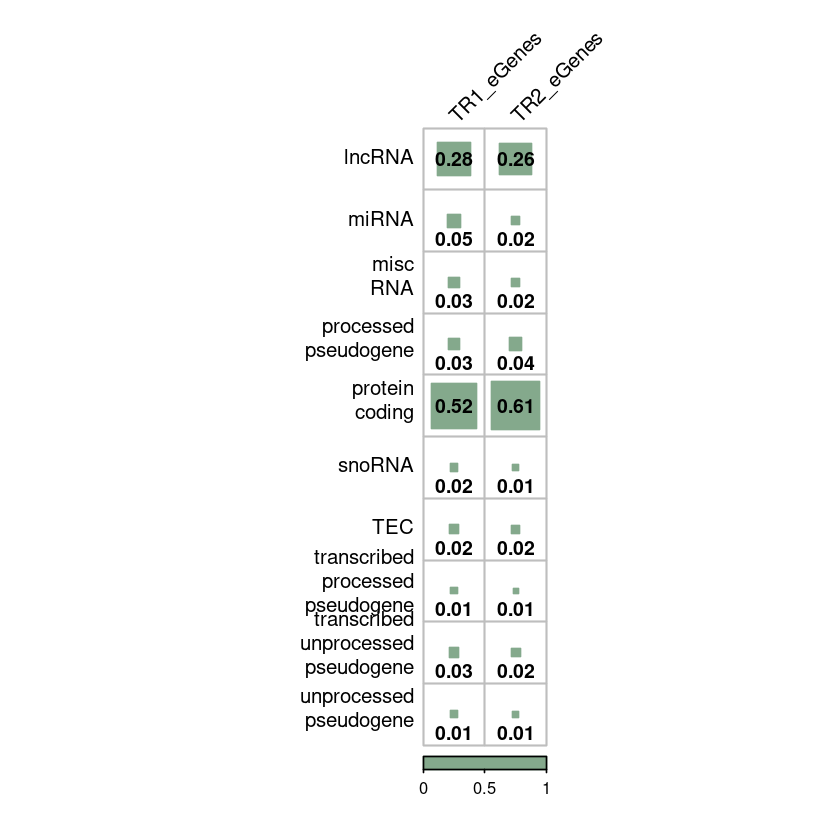

In [79]:
p1 <- corrplot::corrplot(as.matrix(eGenes_biotype_plot_df), 
                         method = 'square', 
                         is.corr = FALSE,
            mar=c(1,1,1,1), family = "Helvetica",
            cl.ratio = 0.1, cl.pos = 'b', cl.length = 3,
            tl.col = 'black', tl.srt = 45,
            col = "#84A98C", col.lim = c(0, 1))$corrPos %>% as.data.frame()

# p1$corr <- c(as.matrix(eGenes_biotype_plot_df))


labels <- round(p1$corr, 2)
spacer <- 0.3
text(p1$x, p1$y-c(0, spacer, spacer, spacer, 0, spacer, spacer, spacer, spacer, spacer), labels, cex = 0.95, font = 2, family = "Helvetica")

# pdf(height = 8, width = 4, file = "../figures/enrich.pdf")
# dev.off()

In [80]:
trim <- eGenes_biotype_df %>% arrange(desc(TR1_eGenes), desc(TR2_eGenes))
trim <- trim[1:5,]
eGenes_biotype_plot_df <- sweep(trim, 2, colSums(trim),`/`)
rownames(eGenes_biotype_plot_df) <- gsub("_", " ", rownames(eGenes_biotype_plot_df))
eGenes_biotype_plot_df

,TR1_eGenes,TR2_eGenes
,<dbl>,<dbl>
protein coding,0.57382040,0.64712514
lncRNA,0.30745814,0.27733935
miRNA,0.05098935,0.01691094
processed pseudogene,0.03767123,0.04171364
misc RNA,0.03006088,0.01691094


In [81]:
pdf(height = 6, width = 4, file = "../figures/enrich_egene.pdf")

p1 <- corrplot::corrplot(as.matrix(eGenes_biotype_plot_df), 
                         method = 'square', 
                         is.corr = FALSE,
            mar=c(1,1,1,1), family = "Helvetica",
            cl.ratio = 0.1, cl.pos = 'b', cl.length = 3,
            tl.col = 'black', tl.srt = 45,
            col = "#d4bcd3", col.lim = c(0, 1))$corrPos %>% as.data.frame()

# p1$corr <- c(as.matrix(eGenes_biotype_plot_df))


labels <- round(p1$corr, 2)
spacer <- 0.3
text(p1$x, p1$y-c(0, 0, spacer, spacer, spacer), 
     labels, cex = 1, font = 2, family = "Helvetica")

dev.off()

png 
  2

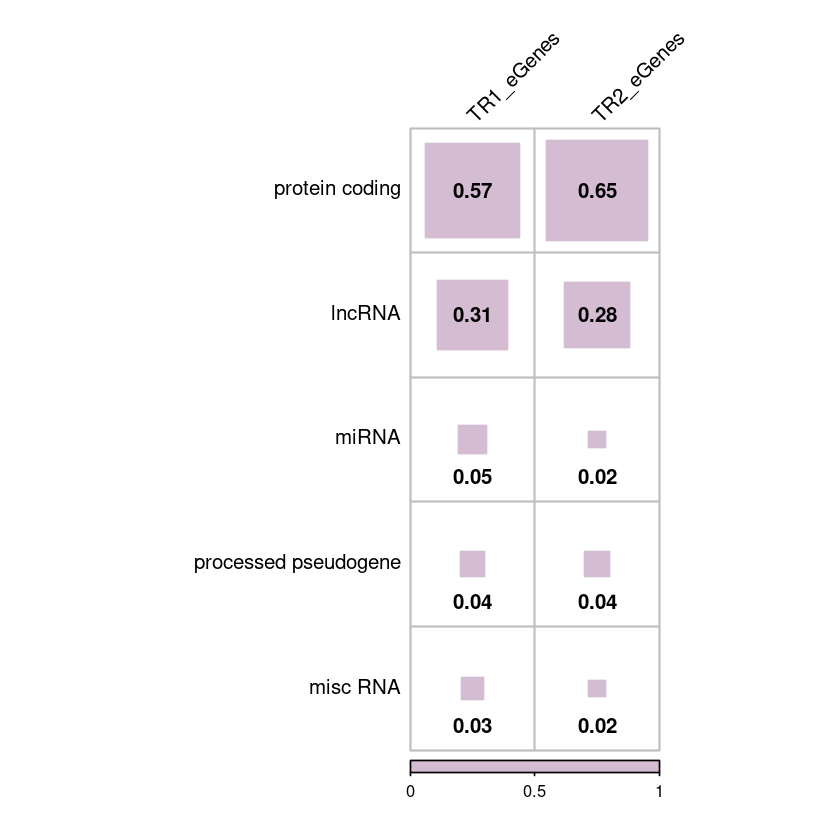

In [82]:
p1 <- corrplot::corrplot(as.matrix(eGenes_biotype_plot_df), 
                         method = 'square', 
                         is.corr = FALSE,
            mar=c(1,1,1,1), family = "Helvetica",
            cl.ratio = 0.1, cl.pos = 'b', cl.length = 3,
            tl.col = 'black', tl.srt = 45,
            col = "#d4bcd3", col.lim = c(0, 1))$corrPos %>% as.data.frame()

# p1$corr <- c(as.matrix(eGenes_biotype_plot_df))


labels <- round(p1$corr, 2)
spacer <- 0.3
text(p1$x, p1$y-c(0, 0, spacer, spacer, spacer), 
     labels, cex = 1, font = 2, family = "Helvetica")

**plot sGene**

In [83]:
sGenes_biotype_plot_df <- merge(eGenes_biotype_df %>% as.data.frame %>% rownames_to_column("biotype"),
                                sGenes_biotype_df %>% as.data.frame %>% rownames_to_column("biotype"), all = T)
# sGenes_biotype_plot_df

In [84]:
trim <- sGenes_biotype_plot_df %>% arrange(desc(TR1_eGenes), desc(TR2_eGenes))
trim <- trim[1:5,]
trim

,biotype,TR1_eGenes,TR2_eGenes,TR1_sGenes,TR2_sGenes
,<chr>,<int>,<int>,<int>,<int>
1,protein_coding,1508,574,3120,511
2,lncRNA,808,246,336,40
3,miRNA,134,15,NA,NA
4,processed_pseudogene,99,37,NA,NA
5,misc_RNA,79,15,NA,NA


In [85]:
trim[is.na(trim)] <- 0
trim <- trim %>% column_to_rownames("biotype") %>% select(contains("sGene"))
trim <- sweep(trim, 2, colSums(trim),`/`)
rownames(trim) <- gsub("_", " ", rownames(trim))
trim

,TR1_sGenes,TR2_sGenes
,<dbl>,<dbl>
protein coding,0.90277778,0.92740472
lncRNA,0.09722222,0.07259528
miRNA,0.00000000,0.00000000
processed pseudogene,0.00000000,0.00000000
misc RNA,0.00000000,0.00000000


In [86]:
pdf(height = 6, width = 4, file = "../figures/enrich_sgene.pdf")

p2 <- corrplot::corrplot(as.matrix(trim), 
                         method = 'square', 
                         is.corr = FALSE,
            mar=c(1,1,1,1), family = "Helvetica",
            cl.ratio = 0.1, cl.pos = 'b', cl.length = 3,
            tl.col = 'black', tl.srt = 45,
            col = "#d4bcd3", col.lim = c(0, 1))$corrPos %>% as.data.frame()
labels <- round(p2$corr, 2)
labels[labels < 0.05] <- ''
spacer <- 0.3
text(p1$x, p1$y-c(0, spacer, spacer, spacer, spacer), 
     labels, cex = 1, font = 2, family = "Helvetica")


dev.off()

png 
  2

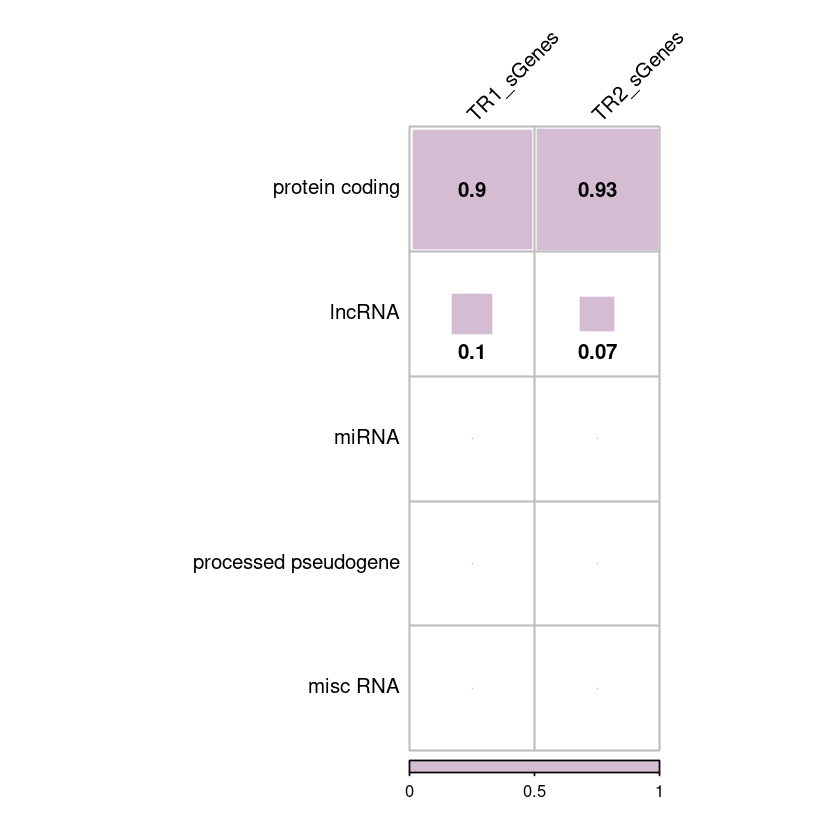

In [88]:
p2 <- corrplot::corrplot(as.matrix(trim), 
                         method = 'square', 
                         is.corr = FALSE,
            mar=c(1,1,1,1), family = "Helvetica",
            cl.ratio = 0.1, cl.pos = 'b', cl.length = 3,
            tl.col = 'black', tl.srt = 45,
            col = "#d4bcd3", col.lim = c(0, 1))$corrPos %>% as.data.frame()
labels <- round(p2$corr, 2)
labels[labels < 0.05] <- ''
spacer <- 0.3
text(p1$x, p1$y-c(0, spacer, spacer, spacer, spacer), 
     labels, cex = 1, font = 2, family = "Helvetica")